<a href="https://colab.research.google.com/github/432386/Group_5/blob/Dajti's-Folder/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American Community Survey Data

The 10k row sample an be found here: https://www.dropbox.com/s/kat852flkm207c2/psam_pus_nonna-FOD1P_10ksample.csv?dl=1 

[See this text file](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2017.txt?#) for details about the varibles. This is a PERSON RECORD file, so search for the PERSON RECORD variables (use Cmd+F or Ctrl+F and search for "PERSON RECORD").

This particular sample includes a 10k sample of rows with non-empty FOD1P values. 

## Questions

1. How may subjects are included in this sample?

2. What is the distribution (min, median, max) of ages? (AGEP)

3. What is the distribution (min, median, max) of incomes?  (WAGP)

4. What is the breakdown (frequency) of each highest-education-achieved? (SCHL)
  - what percentage of the sample holds a masters degree?

5. What is the breakdown (frequency) of each field of degree (FOD1P)
  - what are the top 5 most popular fields in this sample?
  - this may make more sense if we merge with https://www.dropbox.com/s/6en5u9dbsjno6tz/majors-list.csv?dl=1 

6. What is the distribution of incomes by field of degree? (WAGP)
  - what are the top 5 fields based on wage?

7. What is the most common non-English language spoken at home (LANP)...
  - across everyone in the sample
  - by field of study

In [1]:
# The following imports a number of libraries that we'll need, as well as
# configures a number of options that will make interacting with the notebook
# a little easier.

import pandas as pd    # For reading an manipulating tabular data.
import seaborn as sns  # For making pretty plots.
import math            # For common math operations, such as checking for NaNs.
import matplotlib.pyplot as plt # For plotting options.

# Install the library needed to use pd.read_excel().
!pip install xlrd

# By default, Pandas will only show the first 20 columns of a dataframe and
# the first 50 characters of a string. These two settings remove those
# restrictions so that all columns and full strings are displayed.
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)

  Using cached https://files.pythonhosted.org/packages/07/e6/e95c4eec6221bfd8528bcc4ea252a850bffcc4be88ebc367e23a1a84b0bb/xlrd-1.1.0-py2.py3-none-any.whl


In [0]:
# Get the data.
df = pd.read_csv('https://www.dropbox.com/s/kat852flkm207c2/psam_pus_nonna-FOD1P_10ksample.csv?dl=1')

In [3]:
df.head(1)

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHICOVP,FHINS1P,FHINS2P,FHINS3C,FHINS3P,FHINS4C,FHINS4P,FHINS5C,FHINS5P,FHINS6P,FHINS7P,FHISP,FINDP,FINTP,FJWDP,FJWMNP,FJWRIP,FJWTRP,FLANP,FLANXP,FMARP,FMARHDP,FMARHMP,FMARHTP,FMARHWP,FMARHYP,FMIGP,FMIGSP,FMILPP,FMILSP,FOCCP,FOIP,FPAP,FPERNP,FPINCP,FPOBP,FPOWSP,FPRIVCOVP,FPUBCOVP,FRACP,FRELP,FRETP,FSCHGP,FSCHLP,FSCHP,FSEMP,FSEXP,FSSIP,FSSP,FWAGP,FWKHP,FWKLP,FWKWP,FWRKP,FYOEP,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2017000011517,6,1,2400,3,1,1011189,16,59,1,NaN,4.0,2,2,2,2,2,NaN,NaN,2,NaN,NaN,2.0,NaN,NaN,1,2,2,2,2,2,2,0,20.0,1.0,1.0,2,1,2.0,2.0,2.0,2.0,1996.0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,2,2,3,0,0,0,0,1,NaN,21,0,2,0,0,45000,40.0,1,1.0,1.0,NaN,1,902,999,NaN,2,1.0,NaN,1,6203,NaN,1,1,8370.0,86.0,43.0,NaN,NaN,NaN,1,6241,1,NaN,0.0,2010.0,4.0,45000,45000,1,501.0,2400.0,1.0,1,2,2,2,2,2,0,0,1,0,1,0,0,0,0.0,2,2,NaN,NaN,211020,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,11,22,5,19,7,3,42,31,17,15,24,21,9,25,16,16,11,5,7,4,15,13,22,16,24,34,4,5,19,16,18,18,31,5,18,23,20,35,6,4,13,12,30,15,22,28,3,8,23,17,22,16,28,5,12,16,12,30,32,31,18,27,6,22,8,5,45,30,15,17,19,20,10,20,13,19,18,7,30


In [4]:
# 1. How may subjects are included in this sample?

df.shape

(10000, 286)

In [5]:
# 2. What is the distribution (min, median, max) of ages? (AGEP)
df.AGEP.describe()

count    10000.000000
mean     49.661000   
std      16.738826   
min      20.000000   
25%      35.000000   
50%      49.000000   
75%      63.000000   
max      96.000000   
Name: AGEP, dtype: float64

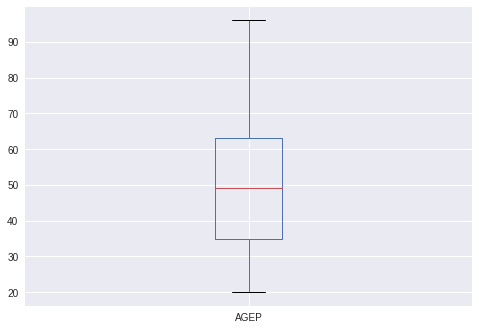

In [6]:
df.AGEP.plot.box()

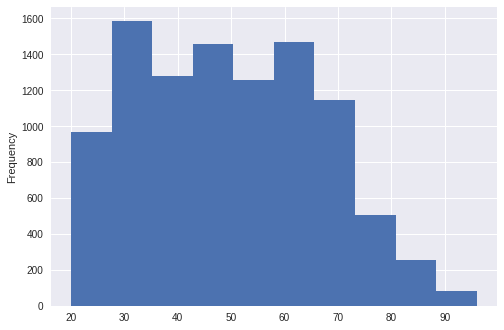

In [7]:
df.AGEP.plot.hist()

count    10000.000000 
mean     57107.872000 
std      81989.261541 
min      0.000000     
25%      0.000000     
50%      36600.000000 
75%      78000.000000 
max      638000.000000
Name: WAGP, dtype: float64

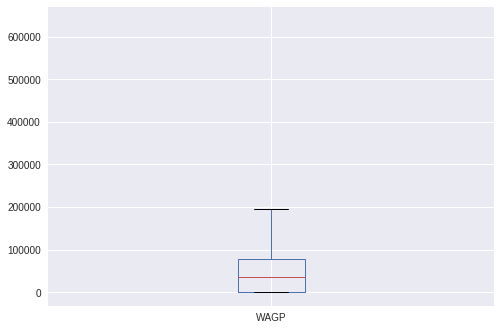

In [8]:
# 3. What is the distribution (min, median, max) of incomes? (WAGP)

df.WAGP.plot.box()
df.WAGP.describe()

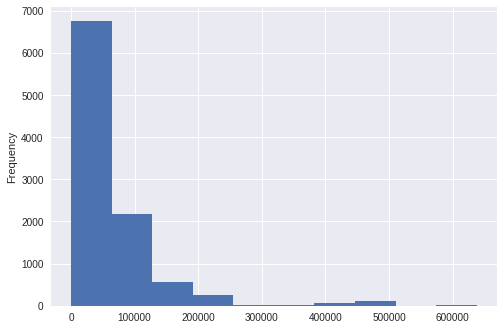

In [9]:
df.WAGP.plot.hist()

In [10]:
# 4. What is the breakdown (frequency) of each highest-education-achieved? (SCHL)

df.SCHL.value_counts()


21    6105
22    2776
23    654 
24    465 
Name: SCHL, dtype: int64

In [11]:
## Same thing, but using groupby.

grouped = df.groupby('SCHL').SERIALNO.count().reset_index(name='frequency')
grouped

,SCHL,frequency
0,21,6105
1,22,2776
2,23,654
3,24,465


In [0]:
schlToDegree = {21: 'Bachelors', 22: 'Masters', 23: 'Professional Degree', 24: 'Doctorate'}
grouped['SCHL_description'] = grouped.SCHL.map(schlToDegree)

In [14]:
grouped

,SCHL,frequency,SCHL_description
0,21,6105,Bachelors
1,22,2776,Masters
2,23,654,Professional Degree
3,24,465,Doctorate


In [15]:
grouped['proportion'] = grouped.frequency / grouped.frequency.sum()
grouped

,SCHL,frequency,SCHL_description,proportion
0,21,6105,Bachelors,0.6105
1,22,2776,Masters,0.2776
2,23,654,Professional Degree,0.0654
3,24,465,Doctorate,0.0465


In [16]:
# 5. What is the breakdown (frequency) of each field of degree (FOD1P)

df.FOD1P.value_counts()

6203    551
6200    462
5200    447
2304    417
6107    414
6201    380
3600    372
2300    361
3301    315
5506    227
6402    221
2408    205
6206    198
5501    196
1901    182
2102    165
5301    159
6207    157
5507    154
2414    144
6000    125
3401    123
3700    122
5003    120
4101    113
5404    107
2901    105
2406    91 
2400    90 
6002    83 
        .. 
2201    6  
5401    6  
1199    5  
5201    5  
4006    5  
2410    5  
5206    4  
1102    4  
3607    4  
5102    4  
2419    4  
5005    4  
2101    4  
5701    4  
2403    4  
2418    3  
5002    3  
5599    3  
1106    3  
6202    2  
4005    2  
6099    2  
5205    2  
5001    2  
2303    2  
5000    2  
2416    1  
3605    1  
1104    1  
5006    1  
Name: FOD1P, Length: 169, dtype: int64

In [17]:
df.FOD1P.value_counts().count()

169

In [18]:
# what are the top 5 most popular fields in this sample?
df.FOD1P.value_counts().sort_values(ascending=False).head()

6203    551
6200    462
5200    447
2304    417
6107    414
Name: FOD1P, dtype: int64

In [19]:
#    this may make more sense if we merge with https://www.dropbox.com/s/6en5u9dbsjno6tz/majors-list.csv?dl=1
fod1pToDescription = pd.read_csv('https://www.dropbox.com/s/6en5u9dbsjno6tz/majors-list.csv?dl=1')
fod1pToDescription.head()

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources


In [0]:
df['FOD1P'] = df.FOD1P.map(str)
df = df.merge(fod1pToDescription, on='FOD1P')

In [21]:
df[['FOD1P', 'Major']].head()

,FOD1P,Major
0,6203,BUSINESS MANAGEMENT AND ADMINISTRATION
1,6203,BUSINESS MANAGEMENT AND ADMINISTRATION
2,6203,BUSINESS MANAGEMENT AND ADMINISTRATION
3,6203,BUSINESS MANAGEMENT AND ADMINISTRATION
4,6203,BUSINESS MANAGEMENT AND ADMINISTRATION


In [22]:
df.Major.value_counts().sort_values(ascending=False).head()

BUSINESS MANAGEMENT AND ADMINISTRATION    551
GENERAL BUSINESS                          462
PSYCHOLOGY                                447
ELEMENTARY EDUCATION                      417
NURSING                                   414
Name: Major, dtype: int64

In [30]:
df[['FOD1P', 'Major', 'Major_Category']]

,FOD1P,Major,Major_Category
0,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
1,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
2,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
3,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
4,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
5,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
6,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
7,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
8,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
9,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
